In [1]:
import numpy as np
import bisect

from matplotlib import pyplot as plt

In [2]:
from pixel3d import Pixel3D

In [3]:
from topologicalunionfind import TopologicalUnionFind

In [4]:
from voidsfinding import VoidsFinding

### Reading Cube

In [5]:
binary = np.fromfile('../cube/map.bin')
binary.shape

(87464,)

In [6]:
cube_shape = (26, 29, 116)

In [7]:
cube = binary.reshape(cube_shape)
cube.shape

(26, 29, 116)

### Counting Number of Islands

In [8]:
import sys
sys.setrecursionlimit(10000)

In [9]:
adata = (cube != 0) * 1
adata.shape

(26, 29, 116)

In [10]:
def numIslands(grid):
    nIslands = 0
    nx = grid.shape[0]
    ny = grid.shape[1]
    nz = grid.shape[2]
    for i in range(nx):
        for j in range(ny):
            for k in range(nz):
                if DFSsearch(grid, i, j, k):
                    nIslands += 1
    return nIslands

In [11]:
def DFSsearch(grid, x, y, z):

    if (grid[x][y][z] == 0):
        return False
    
    grid[x][y][z] = 0
    nx = grid.shape[0]
    ny = grid.shape[1]
    nz = grid.shape[2]
    if (x != 0 and grid[x-1][y][z] == 1):
        DFSsearch(grid, x-1, y, z)
    if (x != nx-1 and grid[x+1][y][z] == 1):
        DFSsearch(grid, x+1, y, z)
    if (y != 0 and grid[x][y-1][z] == 1):
        DFSsearch(grid, x, y-1, z)
    if (y != ny-1 and grid[x][y+1][z] == 1):
        DFSsearch(grid, x, y+1, z)
    if (z != 0 and grid[x][y][z-1] == 1):
        DFSsearch(grid, x, y, z-1)
    if (z != nz-1 and grid[x][y][z+1] == 1):
        DFSsearch(grid, x, y, z+1)
    return True

In [12]:
for i in range(0, adata.shape[2], 8):
    zmin = i
    zmax = i + 10 if i + 10 <= adata.shape[2] else adata.shape[2]
    print('{}:{}'.format(zmin, zmax))
    print(numIslands(adata[:,:,zmin:zmax].copy()))

0:10
1
8:18
1
16:26
1
24:34
1
32:42
1
40:50
1
48:58
1
56:66
1
64:74
1
72:82
1
80:90
1
88:98
1
96:106
1
104:114
1
112:116
3


### Plotting Zeros

In [13]:
bdata = (cube == 0) * 1
bdata.shape

(26, 29, 116)

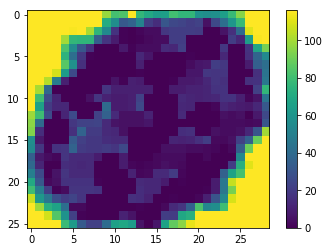

In [14]:
plt.imshow(bdata.sum(axis=2))
plt.colorbar()
plt.show()

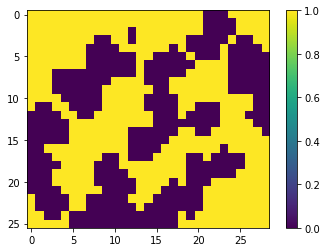

In [15]:
plt.imshow(bdata[:,:,-1])
plt.colorbar()
plt.show()

### diagonal = False

In [16]:
reverse = True
diagonal = False

In [17]:
vf = VoidsFinding(cube, reverse, diagonal)

In [18]:
vf.findVoidsUF()
vf.findVoidsPH('./PerseusMac', 'cube_d0')

CompletedProcess(args=['./PerseusMac', 'nmfsimtop', 'cube_d0.txt', 'cube_d0'], returncode=0)


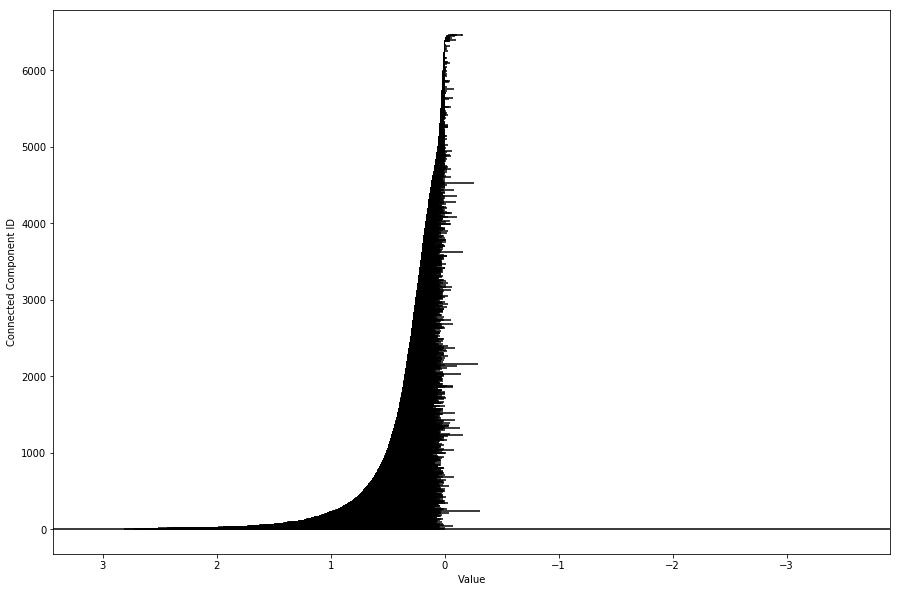

In [19]:
vf.plotPersistenceBarcodesUF()

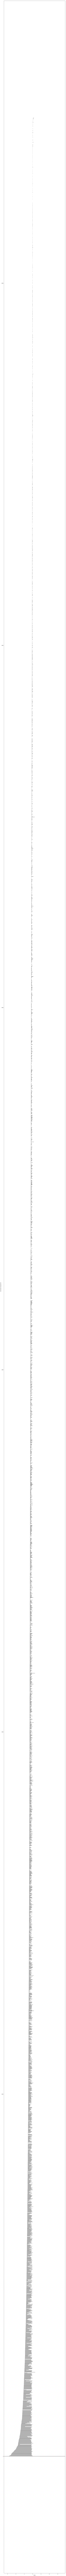

In [20]:
vf.plotPersistenceBarcodesPH()

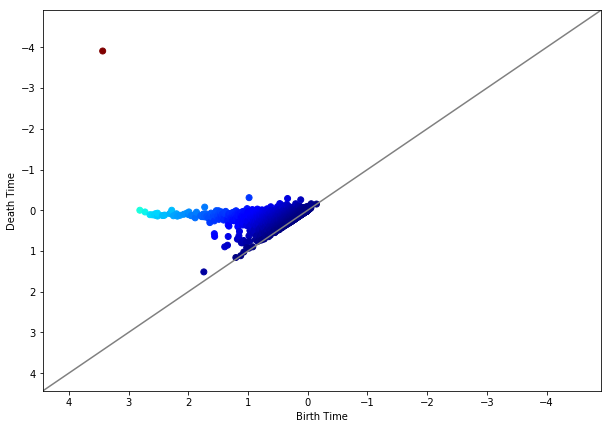

In [21]:
vf.plotPersistenceDiagramUF()

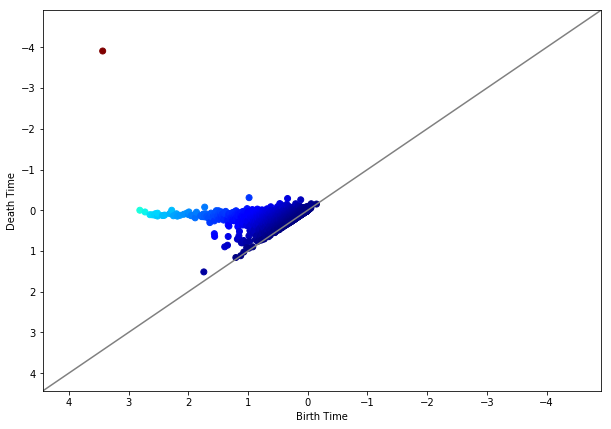

In [22]:
vf.plotPersistenceDiagramPH()

### diagonal = True

In [23]:
reverse = True
diagonal = True

In [24]:
vf = VoidsFinding(cube, reverse, diagonal)

In [25]:
vf.findVoidsUF()
vf.findVoidsPH('./PerseusMac', 'cube_d1')

CompletedProcess(args=['./PerseusMac', 'nmfsimtop', 'cube_d1.txt', 'cube_d1'], returncode=0)


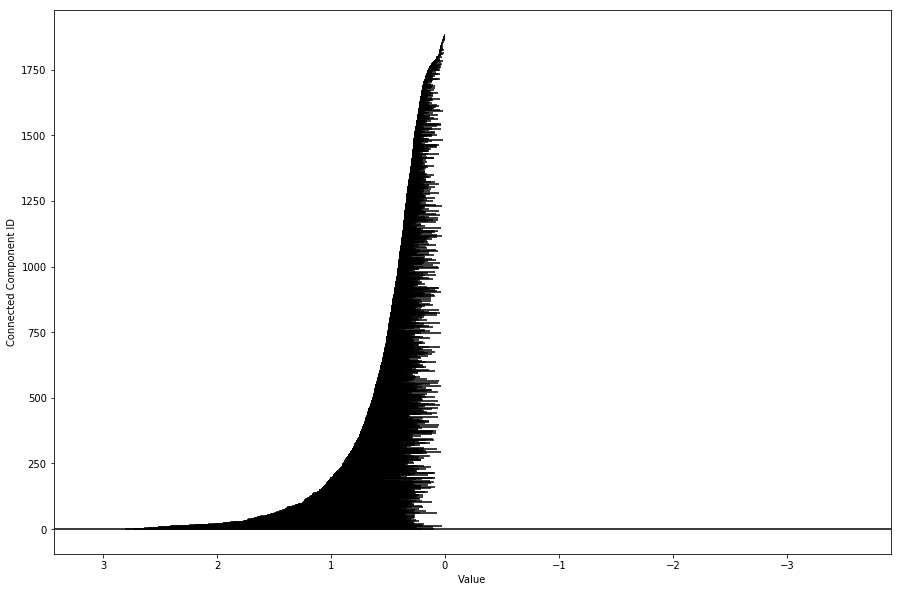

In [26]:
vf.plotPersistenceBarcodesUF()

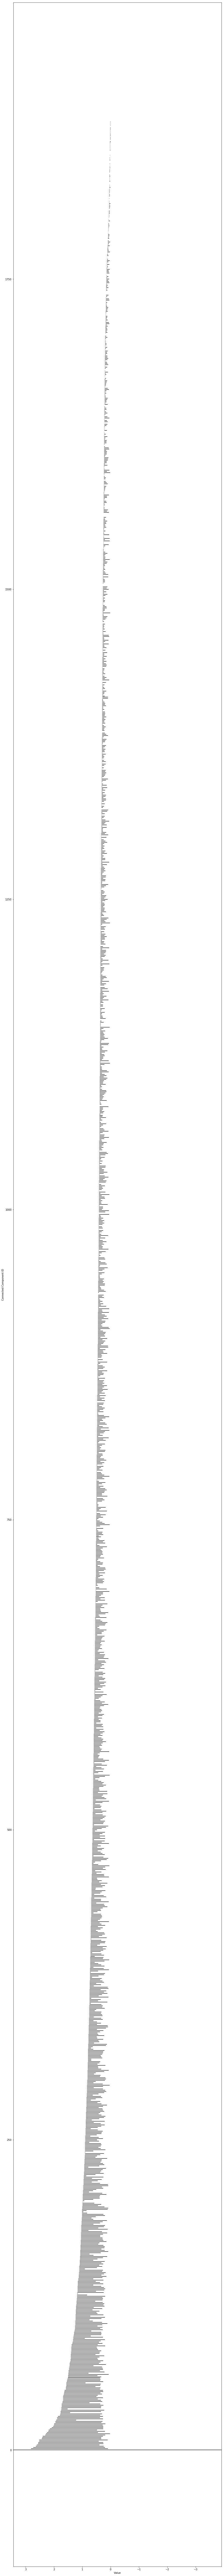

In [27]:
vf.plotPersistenceBarcodesPH()

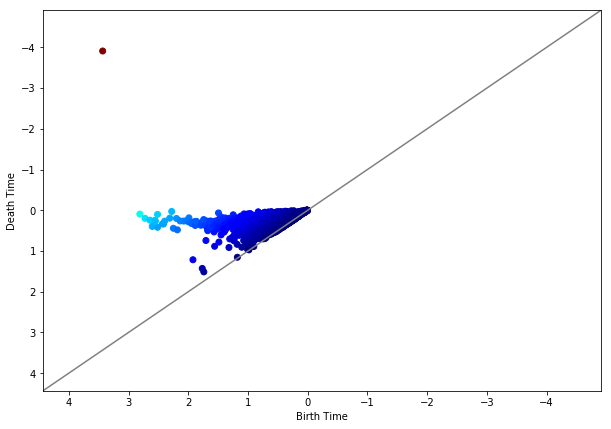

In [28]:
vf.plotPersistenceDiagramUF()

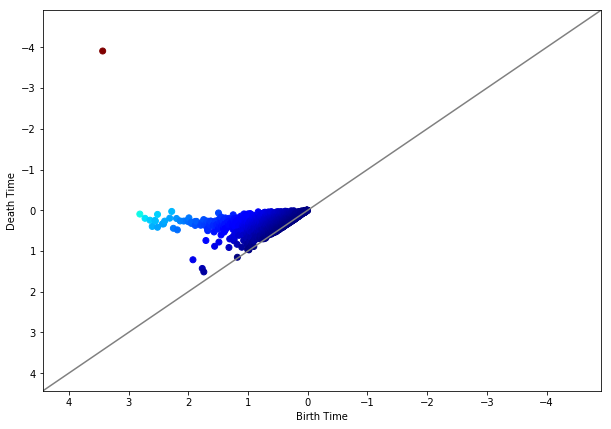

In [29]:
vf.plotPersistenceDiagramPH()